In [ ]:
!pip install -q rasterio
!pip install -q geopandas

     |████████████████████████████████| 1.0 MB 13.7 MB/s 
     |████████████████████████████████| 15.4 MB 50.9 MB/s 
     |████████████████████████████████| 6.3 MB 60.8 MB/s 


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import geopandas as gpd
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
import json

In [ ]:
# Leitura da camada que será utilizada para corte
corte = gpd.GeoDataFrame.from_file('/content/lago_paranoa.geojson')

In [ ]:
# Extraindo coordenadas da camada
coords = [json.loads(corte.to_json())['features'][0]['geometry']]

In [ ]:
# Lendo imagem que será cortada
src = rio.open('/content/Cubo_SR.tif')

# Executando corte
out_img, out_transform = mask(dataset=src, shapes=coords, crop=True)
out_meta = src.meta.copy()
out_meta.update({'width': out_img.shape[0], 'height': out_img.shape[1]})    
# Gravando imagem cortada em disco
with rio.open('corte.tif', "w", 
              **out_meta) as dest:
  dest.write(out_img)

In [ ]:
# Visualizando imagem original
show((src,4), cmap='gray')

In [ ]:
# Lendo e visualizando imagem cortada
img = rio.open('/content/corte.tif')
show(img, cmap="Blues")

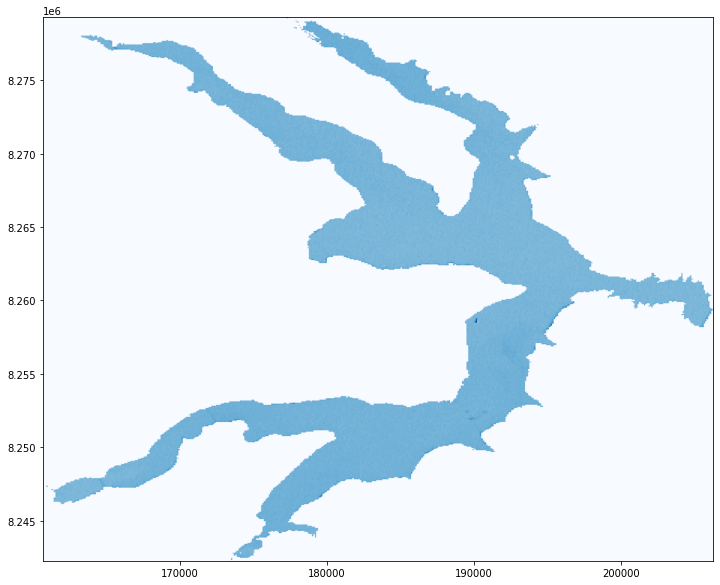